# <p style="text-align:center">Lecture 1. 反応速度論</p>

<p style="text-align:center;font-size:150%;line-height:150%">海津一成</p>

## E-Cell4を使いはじめる前に

まずはお約束

In [1]:
%matplotlib inline
from ecell4 import *

In [2]:
import seaborn
seaborn.set(font_scale=1.5)

In [3]:
import matplotlib as mpl
mpl.rc("figure", figsize=(6, 4))

実際に使ってみる

In [4]:
%matplotlib inline
from ecell4 import *

with reaction_rules():
    pass  # ここに反応を記述していく

run_simulation(5, {'X': 0}, return_type=None)  # 計算を実行する

基本これだけ

## 零次反応

<p style="text-align:center">零次反応: 反応速度が濃度によらず一定</p>

$${\emptyset}{\rightarrow}P$$

$$v=\frac{\mathrm{d}[P]}{\mathrm{dt}}=k$$

すなわち

$$[P]=\int k \mathrm{d}t=kt+[P]_0$$

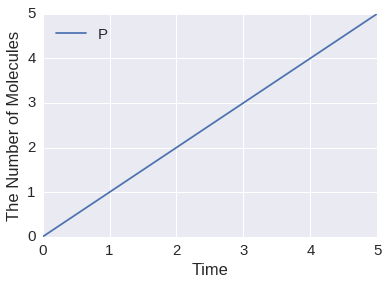

In [5]:
with reaction_rules():
    ~P > P | 1.0  # zeroth-order

run_simulation(5, {'P': 0})  # P0=0

## 一次反応

<p style="text-align:center">一次反応: 反応速度が基質の濃度に比例</p>

$$S{\rightarrow}P$$

$$v=\frac{\mathrm{d}[P]}{\mathrm{dt}}=-\frac{\mathrm{d}[S]}{\mathrm{dt}}=k[S]$$

$$-\frac{1}{[S]}\mathrm{d}[S]=k\mathrm{dt}\ {\Longleftrightarrow}\ {\ln}[S]=-\int k \mathrm{d}t=-kt+C$$

すなわち

$$[S]=[S]_0e^{-kt}$$

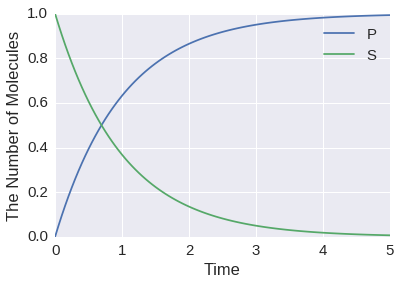

In [6]:
with reaction_rules():
    S > P | 1.0  # first-order

run_simulation(5, {'S': 1})  # S0=1

## 二次反応

<p style="text-align:center">二次反応: 反応がふたつの基質の濃度の積に比例<p>

$$A+B{\rightarrow}P$$

$$v=\frac{\mathrm{d}[P]}{\mathrm{dt}}=-\frac{\mathrm{d}[A]}{\mathrm{dt}}=-\frac{\mathrm{d}[B]}{\mathrm{dt}}=k[A][B]$$

$$\frac{\mathrm{d}[P]}{\mathrm{dt}}=k\left([A]_0+[P]_0-[P]\right)\left([B]_0+[P]_0-[P]\right)\ \Longleftrightarrow\ \frac{\mathrm{d}[P]}{\left([A]_0+[P]_0-[P]\right)\left([B]_0+[P]_0-[P]\right)}=kt+C$$

$$\Longleftrightarrow\ \frac{\mathrm{d}[P]}{[B]_0-[A]_0}\left[\frac{1}{[A]_0+[P]_0-[P]}-\frac{1}{[B]_0+[P]_0-[P]}\right]=kt+C$$

$$\Longleftrightarrow\ \frac{1}{[B]_0-[A]_0}\left[-\ln\frac{[A]}{[A]_0}+\ln\frac{[B]}{[B]_0}\right]=kt+C$$

$$\Longleftrightarrow\ \frac{1}{[A]_0-[B]_0}\ln\frac{[A]}{[B]}\frac{[B]_0}{[A]_0}=kt+C$$

$[A]_0=[B]_0$ならば

$$\frac{\mathrm{d}[A]}{\mathrm{dt}}=-k[A]^2\ \Longleftrightarrow\ \frac{\mathrm{d}[A]}{[A]^2}=-\frac{1}{[A]}=-kt+C$$

すなわち

$$[A]=[B]=\frac{[A]_0}{kt\times[A]_0+1}$$

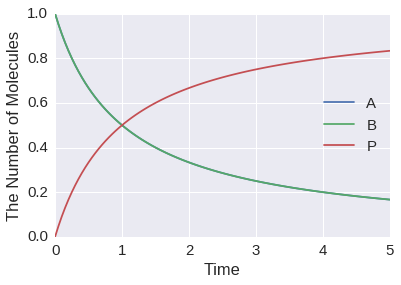

In [7]:
with reaction_rules():
    A + B > P | 1.0  # second-order
    
run_simulation(5, {'A': 1, 'B': 1})  # A0=B0=1

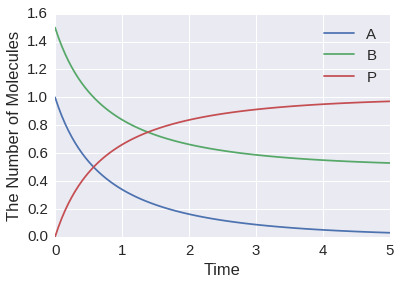

In [8]:
with reaction_rules():
    A + B > P | 1.0  # second-order
    
run_simulation(5, {'A': 1, 'B': 1.5})  # A0=1, B0=1.5

## ミカエリス・メンテン式

<p style="text-align:center">ミカエリス・メンテン式: 酵素による反応速度式の基本</p>

$$E+S{\leftrightarrow}ES{\rightarrow}E+P$$

迅速平衡か定常状態を仮定すると

$$v=-\frac{\mathrm{d}[S]}{\mathrm{d}t}=\frac{\mathrm{d}[P]}{\mathrm{d}t}=\frac{k[E][S]}{K_m+[S]}$$

のかたちで書ける

詳しくは[Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%9F%E3%82%AB%E3%82%A8%E3%83%AA%E3%82%B9%E3%83%BB%E3%83%A1%E3%83%B3%E3%83%86%E3%83%B3%E5%BC%8F)を見よ

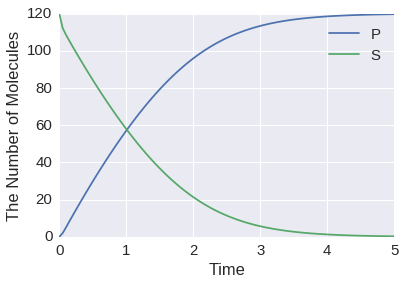

In [9]:
with reaction_rules():
    E + S > ES | 0.25  # 二次
    ES > E + S | 5.0  # 一次
    ES > E + P | 10.0  # 一次

run_simulation(5, {'E': 10, 'S': 120}, species_list=('S', 'P'))

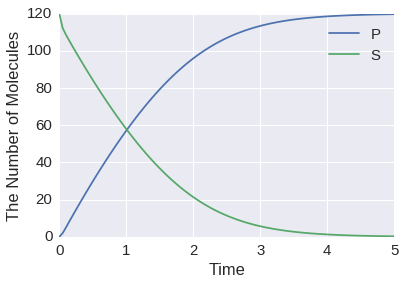

In [10]:
with reaction_rules():
    E + S == ES | (0.25, 5.0) > E + P | 10.0

run_simulation(5, {'E': 10, 'S': 120}, species_list=('S', 'P'))

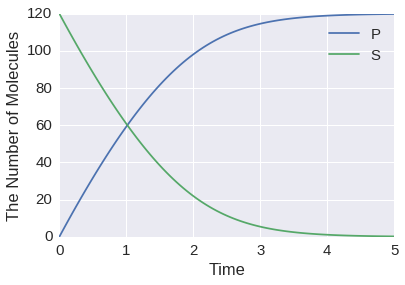

In [11]:
with reaction_rules():
    Km = (5.0 + 10.0) / 0.25
    S > P | (10.0 * E * S / (Km + S))

run_simulation(5, {'E': 10, 'S': 120}, species_list=('S', 'P'))

## ヒル式

<p style="text-align:center">ヒル式: 多段のミカエリス・メンテン式に相当</p>

$$E+S{\rightarrow}E+P$$

式もミカエリス・メンテン式を拡張したもの

$$v=-\frac{\mathrm{d}[S]}{\mathrm{d}t}=\frac{\mathrm{d}[P]}{\mathrm{d}t}=\frac{k[E][S]^\mathrm{n_H}}{K_m^\mathrm{n_H}+[S]^\mathrm{n_H}}$$

$\mathrm{n_H}$はヒル係数呼ばれる

グラフを表示するために追加のライブラリを利用する

In [12]:
import matplotlib.pylab as plt
import numpy as np

ヒル係数が大きいと入出力の関係がスイッチ様（シグモイド型）になる

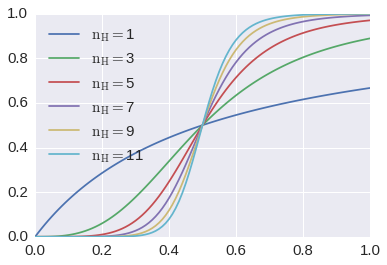

In [13]:
x = np.linspace(0, 1, 101)
for nH in range(1, 12, 2):
    plt.plot(x, [xi ** nH / (0.5 ** nH + xi ** nH) for xi in x],
             label=r'$\mathrm{n_H}=$' + str(nH))
plt.legend(loc='best')
plt.show()

これを酵素反応として使うと、、、

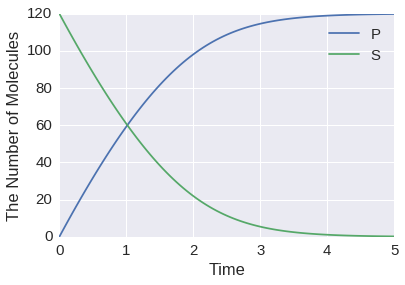

In [14]:
with reaction_rules():
    Km, nH = 60, 2
    S > P | (10 * E * S / (Km + S))  # ミカエリス・メンテン式

run_simulation(5, {'E': 10, 'S': 120}, species_list=('S', 'P'))

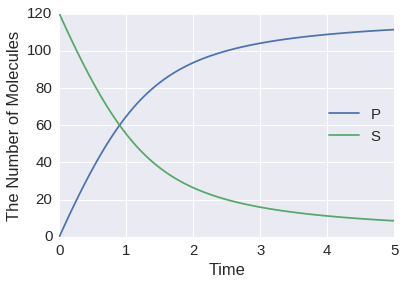

In [15]:
with reaction_rules():
    Km, nH = 60, 2
    S > P | (10 * E * S ** nH / (Km ** nH + S ** nH))

run_simulation(5, {'E': 10, 'S': 120}, species_list=('S', 'P'))

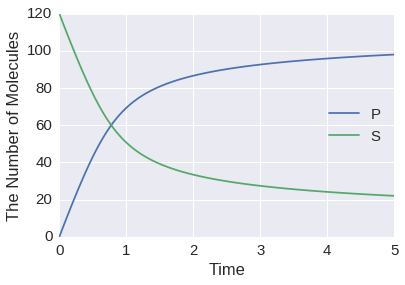

In [16]:
with reaction_rules():
    Km, nH = 60, 4
    S > P | (10 * E * S ** nH / (Km ** nH + S ** nH))

run_simulation(5, {'E': 10, 'S': 120}, species_list=('S', 'P'))

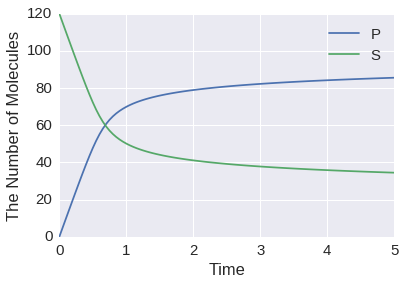

In [17]:
with reaction_rules():
    Km, nH = 60, 8
    S > P | (10 * E * S ** nH / (Km ** nH + S ** nH))

run_simulation(5, {'E': 10, 'S': 120}, species_list=('S', 'P'))

## 遺伝子発現

## 発現と分解

遺伝子発現もこうした反応速度式で記述されることが多い

$${\emptyset}{\rightarrow}{\mathrm mRNA}{\rightarrow}{\emptyset}$$

発現は零次で分解は一次の式とすると

$$\frac{\mathrm{d}[\mathrm{mRNA}]}{\mathrm{d}t}=k_1-k_2[\mathrm{mRNA}]$$

これを解くと

$$\frac{\mathrm{d}[\mathrm{mRNA}]}{k_1-k_2[\mathrm{mRNA}]}={\mathrm{d}t}$$

$z=k_1-k_2[\mathrm{mRNA}]$と置くと

$$\frac{-1}{k_2}\frac{\mathrm{d}z}{z}={\mathrm{d}t}\ {\Longleftrightarrow}\ {\ln}z=-k_2t+C$$

$$[\mathrm{mRNA}]=\frac{k_1}{k_2}-\frac{k_1-k_2[\mathrm{mRNA}]_0}{k_2}e^{-k_2t}$$

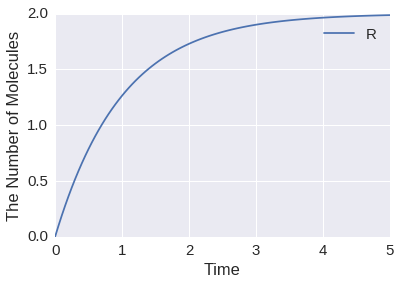

In [18]:
with reaction_rules():
    ~R > R | 2  # 発現
    R > ~R | 1  # 分解

run_simulation(5, {'R': 0})

## 発現制御

発現が転写因子などで制御されている場合は発現の式に転写因子の量を加味すれば良い

$$\frac{\mathrm{d}[\mathrm{mRNA}]}{\mathrm{d}t}=f([X])-k_2[\mathrm{mRNA}]$$

例えば一次の式ならば

$$\frac{\mathrm{d}[\mathrm{mRNA}]}{\mathrm{d}t}=k_1[X]-k_2[\mathrm{mRNA}]$$

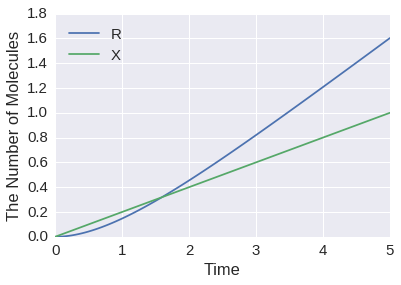

In [19]:
with reaction_rules():
    ~X > X | 0.2
    ~R > R | 2 * X  # 発現
    R > ~R | 1  # 分解

run_simulation(5, {'R': 0, 'X': 0})

制御の式にヒル式を使うとスイッチのような応答を表現することができる

$$\frac{\mathrm{d}[\mathrm{mRNA}]}{\mathrm{d}t}=k_1\frac{[X]^n}{K_m^n+[X]^n}-k_2[\mathrm{mRNA}]$$

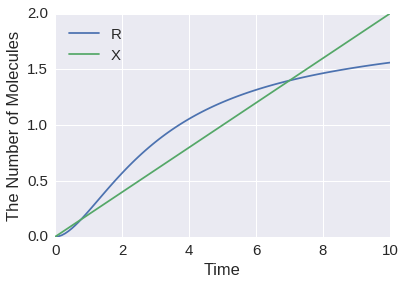

In [20]:
with reaction_rules():
    ~X > X | 0.2
    ~R > R | 2 * X / (0.5 + X)  # 発現
    R > ~R | 1  # 分解

run_simulation(10, {'R': 0, 'X': 0})

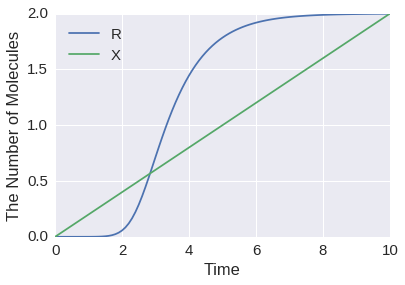

In [21]:
with reaction_rules():
    ~X > X | 0.2
    ~R > R | 2 * X ** 8 / (0.5 ** 8 + X ** 8)  # 発現
    R > ~R | 1  # 分解

run_simulation(10, {'R': 0, 'X': 0})

ヒル係数が大きくなればなるほどよりスイッチらしくなる

In [22]:
def Hill(X, n):
    return 2 * X ** n / (0.5 ** n + X ** n)

with reaction_rules():
    ~X > X | 0.2
    ~R1 > R1 | Hill(X, 1) > ~R1 | 1
    ~R2 > R2 | Hill(X, 2) > ~R2 | 1
    ~R4 > R4 | Hill(X, 4) > ~R4 | 1
    ~R8 > R8 | Hill(X, 8) > ~R8 | 1
    ~R16 > R16 | Hill(X, 16) > ~R16 | 1

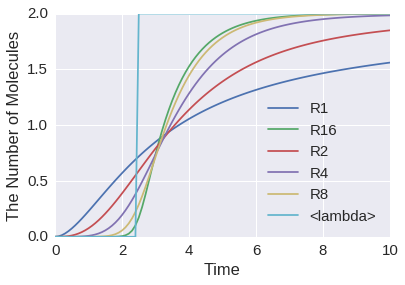

In [23]:
run_simulation(10, species_list=('R1', 'R2', 'R4', 'R8', 'R16'),
               opt_args=[lambda t: 0 if t < 2.5 else 2])

ヒル式の分母をかえると抑制制御も表現できるようになる

$$\frac{\mathrm{d}[\mathrm{mRNA}]}{\mathrm{d}t}=k_1\frac{K_m^n}{K_m^n+[X]^n}-k_2[\mathrm{mRNA}]$$

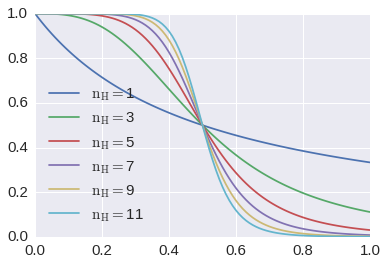

In [24]:
x = np.linspace(0, 1, 101)
for nH in range(1, 12, 2):
    plt.plot(x, [0.5 ** nH / (0.5 ** nH + xi ** nH) for xi in x],
             label=r'$\mathrm{n_H}=$' + str(nH))
plt.legend(loc='best')
plt.show()

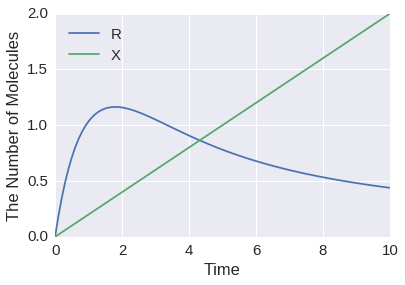

In [25]:
with reaction_rules():
    ~X > X | 0.2
    ~R > R | 2 * 0.5 / (0.5 + X)  # 発現
    R > ~R | 1  # 分解

run_simulation(10, {'R': 0, 'X': 0})

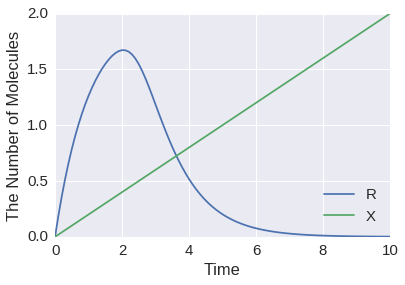

In [26]:
with reaction_rules():
    ~X > X | 0.2
    ~R > R | 2 * 0.5 ** 8 / (0.5 ** 8 + X ** 8)  # 発現
    R > ~R | 1  # 分解

run_simulation(10, {'R': 0, 'X': 0})

こちらも分母をかえるとよりスイッチらしくなる

In [27]:
def Hill(X, n):
    return 2 * 0.5 ** n / (0.5 ** n + X ** n)

with reaction_rules():
    ~X > X | 0.2
    ~R1 > R1 | Hill(X, 1) > ~R1 | 1
    ~R2 > R2 | Hill(X, 2) > ~R2 | 1
    ~R4 > R4 | Hill(X, 4) > ~R4 | 1
    ~R8 > R8 | Hill(X, 8) > ~R8 | 1
    ~R16 > R16 | Hill(X, 16) > ~R16 | 1

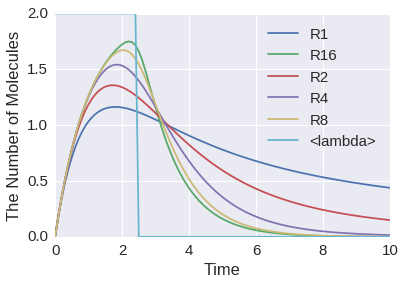

In [28]:
run_simulation(10, species_list=('R1', 'R2', 'R4', 'R8', 'R16'),
               opt_args=[lambda t: 2 if t < 2.5 else 0])

ちなみに$K_m$がかわると切り替りのタイミングがかわる

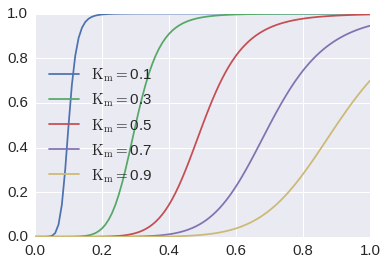

In [29]:
x = np.linspace(0, 1, 101)
nH = 8
for i in range(1, 10, 2):
    Km = i * 0.1
    plt.plot(x, [xi ** nH / (Km ** nH + xi ** nH) for xi in x],
             label=r'$\mathrm{K_m}=$' + '{:.1f}'.format(Km))
plt.legend(loc='best')
plt.show()

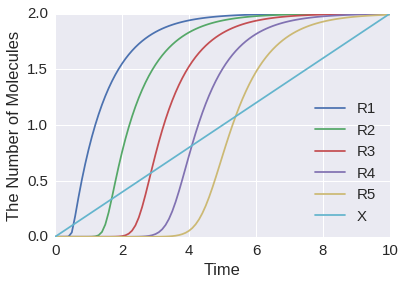

In [30]:
def Hill(X, Km):
    return 2 * X ** 16 / (Km ** 16 + X ** 16)

with reaction_rules():
    ~X > X | 0.2
    ~R1 > R1 | Hill(X, 0.1) > ~R1 | 1
    ~R2 > R2 | Hill(X, 0.3) > ~R2 | 1
    ~R3 > R3 | Hill(X, 0.5) > ~R3 | 1
    ~R4 > R4 | Hill(X, 0.7) > ~R4 | 1
    ~R5 > R5 | Hill(X, 0.9) > ~R5 | 1

run_simulation(10)

### 化学反応ネットワークモデルの多くは<br/>これらの組み合せでできている

## 実例

## ヒト赤血球の解糖系

- Rapoport, T.A. and Heinrich, R. (1975) "Mathematical analysis of multienzyme systems. I. Modelling of the glycolysis of human erythrocytes.", Biosystems., 7, 1, 120-129. 
- Heinrich, R. and Rapoport, T.A. (1975) "Mathematical analysis of multienzyme systems. II. Steady state and transient control.", Biosystems., 7, 1, 130-136.
- 6変数、8反応

In [31]:
with reaction_rules():
    # ヒル式
    2 * ATP > 2 * A13P2G + 2 * ADP | (3.2 * ATP / (1 + (ATP / 1) ** 4))
    A13P2G > A23P2G | 1500  # 一次
    A23P2G > PEP | 0.15  # 一次
    A13P2G + ADP > PEP + ATP | 1.57e+4  # 二次
    PEP + ADP > ATP | 559  # 二次
    AMP + ATP == 2 * ADP | (1 * AMP * ATP,  2 * ADP * ADP)  # 二次
    ATP > ADP | 1.46  # 一次

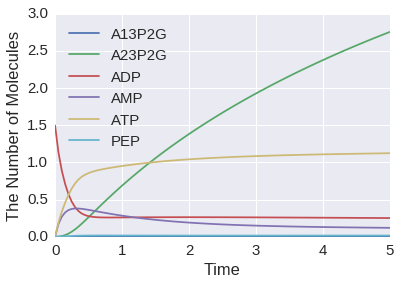

In [32]:
run_simulation(5, {"ADP": 1.496006})

## ショウジョウバエの概日リズム

- A. Goldbeter, "A model for circadian oscillations in the Drosophila period protein(PER)", Proc R Soc Lond B Biol Sci, Vol.261:319-324, Sep 1995.
- 振動系の大家Goldbeter博士の古典的な数理モデルの論文のひとつ
- ショウジョウバエの概日リズムをたんぱく質（PER）量の振動としてモデル化したもの
- 遺伝子発現とリン酸化反応によって表現されている
- 5変数、10反応

In [33]:
with reaction_rules():
    ~M > M | 0.76 / (1 + Pn ** 3)  # ヒル式（零次）
    M > ~M | 0.65 * M / (0.5 + M)  # ミカエリス・メンテン式
    ~P0 > P0 | 0.38 * M  # 零次
    P0 > P1 | 3.2 * P0 / (2 + P0)  # ミカエリス・メンテン式
    P1 > P0 | 1.58 * P1 / (2 + P1)  # ミカエリス・メンテン式
    P1 > P2 | 5 * P1 / (2 + P1)  # ミカエリス・メンテン式
    P2 > P1 | 2.5 * P2 / (2 + P2)  # ミカエリス・メンテン式
    P2 == Pn | (1.9, 1.3)  # 一次
    P2 > ~P2 | 0.95 * P2 / (0.2 + P2)  # ミカエリス・メンテン式

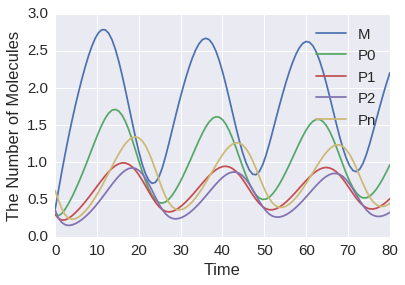

In [34]:
run_simulation(80, {"M": 0.361328202, "Pn": 0.621367, "P0": 0.301106835,
                    "P1": 0.301106835, "P2": 0.361328202})